## Time Series Homework

Created by Peerachai Banyongrakkul Sec.1 5988070

This dataset is taken from https://data.world/data-society/capital-bikeshare-2011-2012/workspace/file?filename=bike+data.csv

### Data Dictionary of Bike Sharing Dataset

| Variable  |        Definition                                    |                 Key                               |
|-----------------|--------------------------------------------|------------------------------------------------|
| Date| Renting Date||
| Season|Season|1:Spring, 2:Summer, 3:Fall, 4:Winter|   
| Hour| Hour (0 - 23) | |
| Holiday| Whether day is holiday or not |0:No, 1:Yes |
| Day of the Week | Day of the week |    
| Working Day | Whether day is working day or not |0:No, 1:Yes
| Weather Type | Type of Weather|1: Clear, Few clouds, Partly cloudy, Partly cloudy <br/> 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist <br/> 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds <br/> 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog|
| Temperature F | Temperature in Fahrenheit |  |                                             
| Temperature Feels F| Feeling temperature in Fahrenheit  |                                        
| Humidity| Humidity |  |
| Wind Speed| Wind Speed||
| Casual Users| Count of casual users||
| Registered Users| Count of registered users||
| Total Users|Count of total rental bikes including both casual and registered||

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import pandas as pd
import statsmodels.api as sm
import matplotlib

In [2]:
df = pd.read_csv("bike_data.csv")
df.head()

,Date,Season,Hour,Holiday,Day of the Week,Working Day,Weather Type,Temperature F,Temperature Feels F,Humidity,Wind Speed,Casual Users,Registered Users,Total Users
0,1/1/2011,4,0,0,6,0,1,36.6,37.4,81,0,3,13,16
1,1/1/2011,4,1,0,6,0,1,34.9,35.6,80,0,8,32,40
2,1/1/2011,4,2,0,6,0,1,34.9,35.6,80,0,5,27,32
3,1/1/2011,4,3,0,6,0,1,36.6,37.4,75,0,3,10,13
4,1/1/2011,4,4,0,6,0,1,36.6,37.4,75,0,0,1,1


### Data Preprocessing
- Checking missing data

In [3]:
df.isnull().sum()

Date                   0
Season                 0
Hour                   0
Holiday                0
Day of the Week        0
Working Day            0
Weather Type           0
Temperature F          0
Temperature Feels F    0
Humidity               0
Wind Speed             0
Casual Users           0
Registered Users       0
Total Users            0
dtype: int64

- I start to use ARIMA model to do the time series analysis and forcasting for Weather Type 1 (Clear, Few clouds, Partly cloudy, Partly cloudy).

In [4]:
weather_type1 = df.loc[df['Weather Type'] == 1]
weather_type1.head()

,Date,Season,Hour,Holiday,Day of the Week,Working Day,Weather Type,Temperature F,Temperature Feels F,Humidity,Wind Speed,Casual Users,Registered Users,Total Users
0,1/1/2011,4,0,0,6,0,1,36.6,37.4,81,0,3,13,16
1,1/1/2011,4,1,0,6,0,1,34.9,35.6,80,0,8,32,40
2,1/1/2011,4,2,0,6,0,1,34.9,35.6,80,0,5,27,32
3,1/1/2011,4,3,0,6,0,1,36.6,37.4,75,0,3,10,13
4,1/1/2011,4,4,0,6,0,1,36.6,37.4,75,0,0,1,1


In [5]:
weather_type1.describe(include='all')

,Date,Season,Hour,Holiday,Day of the Week,Working Day,Weather Type,Temperature F,Temperature Feels F,Humidity,Wind Speed,Casual Users,Registered Users,Total Users
count,11413,11413.000000,11413.000000,11413.000000,11413.000000,11413.000000,11413.0,11413.000000,11413.000000,11413.000000,11413.000000,11413.000000,11413.000000,11413.000000
unique,700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,10/21/2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.447034,11.731709,0.029878,2.999124,0.668711,1.0,59.991326,61.220310,57.374660,12.766757,40.545431,164.323841,204.869272
std,NaN,1.088497,7.015996,0.170259,2.030395,0.470697,0.0,17.330803,21.259839,17.846308,8.293887,53.126559,156.890453,189.487773
min,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,17.600000,3.200000,8.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,6.000000,0.000000,1.000000,0.000000,1.0,45.200000,42.800000,43.000000,7.000000,5.000000,39.000000,46.000000
50%,NaN,2.000000,12.000000,0.000000,3.000000,1.000000,1.0,60.800000,62.600000,56.000000,13.000000,20.000000,128.000000,159.000000
75%,NaN,3.000000,18.000000,0.000000,5.000000,1.000000,1.0,74.600000,78.800000,71.000000,17.000000,56.000000,232.000000,304.000000


* Convert data type of "Date" from object to datetime and also check date range.

In [6]:
weather_type1.Date = weather_type1.Date.apply(pd.to_datetime)
weather_type1['Date'].min(), weather_type1['Date'].max()

(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-12-31 00:00:00'))

- Drop columns that don't require

In [7]:
weather_type1.drop(['Season',
                    'Hour',
                    'Holiday',
                    'Day of the Week',
                    'Working Day',
                    'Temperature F',
                    'Temperature Feels F',
                    'Humidity',
                    'Wind Speed',
                    'Casual Users',
                    'Registered Users'],axis=1, inplace=True)

- Aggregate total users by date

In [8]:
weather_type1 = weather_type1.sort_values('Date')
weather_type1 = weather_type1.groupby('Date')['Total Users'].sum().reset_index()

### Indexing with Time Series Data
* Using "Date" column as a index of this dataframe

In [9]:
weather_type1 = weather_type1.set_index('Date')
weather_type1.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='Date', length=700, freq=None)

In [10]:
weather_type1.head()

,Total Users
Date,
2011-01-01,305
2011-01-02,165
2011-01-03,1349
2011-01-04,1520
2011-01-05,1600


- Get average for sample of each month and visualize total users for each month

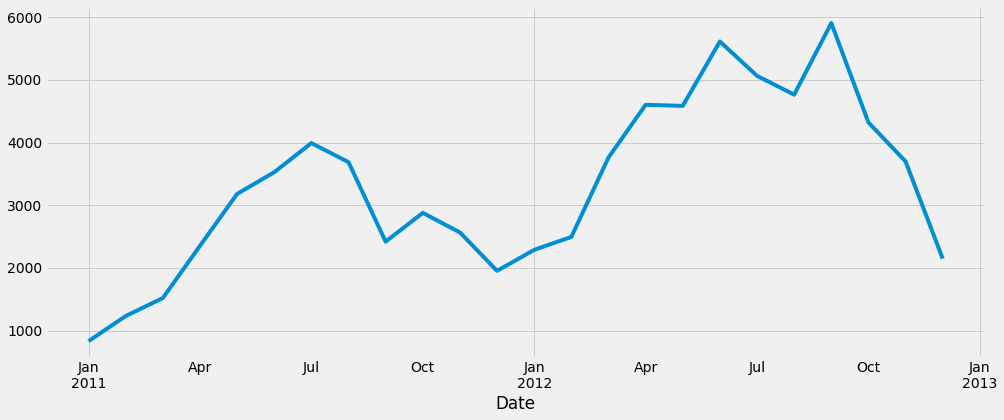

In [11]:
y = weather_type1['Total Users'].resample('MS').mean()
plt.style.use('fivethirtyeight')
y.plot(figsize=(15, 6))
plt.show()

- When I use time-series decomposition to visualize this data, it is obvious that total users in weather type 1 has seasonality pattern. The number of bicycle users is low at the beginning of the year, high at the middle of the year, and become low again at the end of the year. Moreover, this data also has upward trend because the number of user keeps increasing every year.

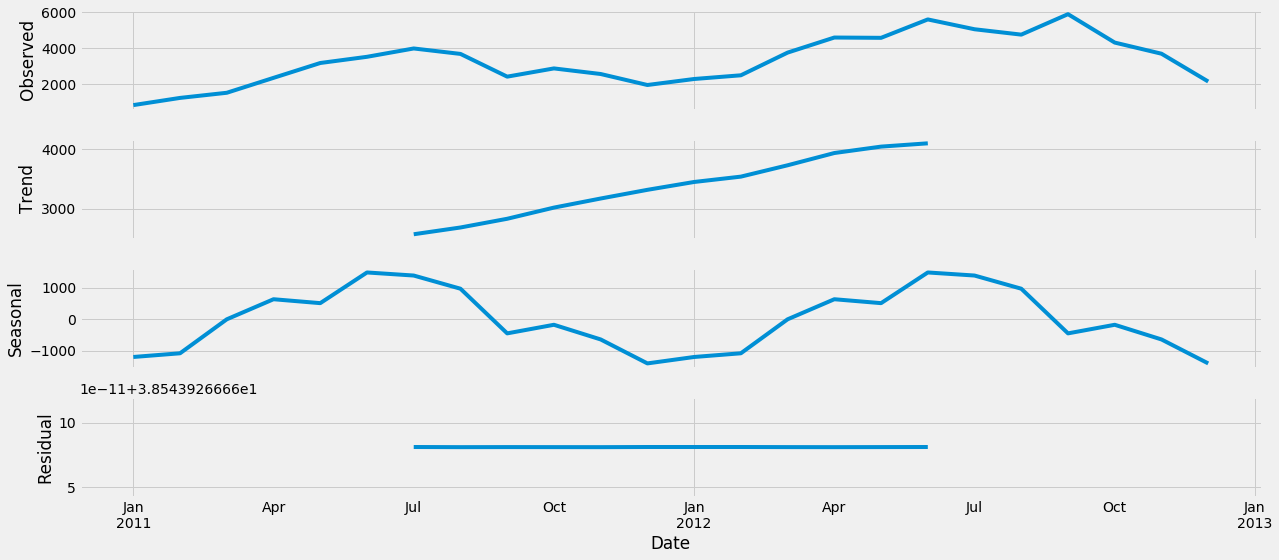

In [12]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')

fig = decomposition.plot()
plt.show()

### Use ARIMA model to do time series forecasting 

In [13]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

- Use grid search to find the optimal set of parameters that yields the best performance for our model and I found that SARIMAX(0, 1, 1)x(0, 1, 0, 12) yields the lowest AIC value of 152.95.

In [14]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:444.527795302822
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:198.1963832379592
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:203.90995470695628
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:412.56072027616756
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:176.83367472390282
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:205.4852659248862
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:359.5238987108769
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:172.0000262930715
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:186.56509462055422
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:345.9108453853883
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:152.94792061125105
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:187.73038480376545
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:376.84882906079434
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:188.53604079032917
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:189.07535933455281
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:363.06261169344674
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:169.90911789894344
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:187.94065380697324

D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


- Fit ARIMA model with the dataset and above parameters.

In [15]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000      0.511     -1.955      0.051      -2.002       0.002
sigma2      7.887e+05   6.48e-07   1.22e+12      0.000    7.89e+05    7.89e+05


### Validating forecasts
- I set forecasts to start at 2012-07-01 to the end if the data for comparing the predicted total users with the real one

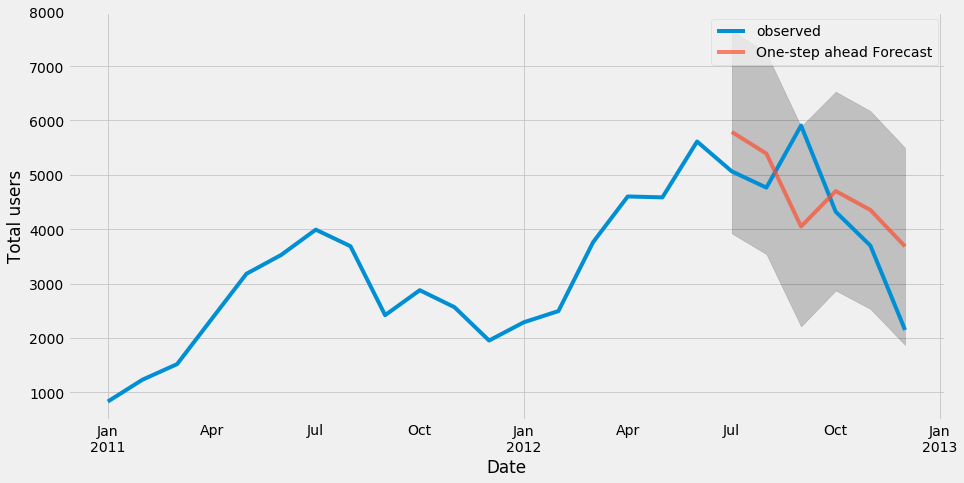

In [16]:
pred = results.get_prediction(start=pd.to_datetime('2012-07-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Total users')
plt.legend()
plt.show()

- From line plot above, it is not perfect, however, the predicted one is able to show the seasonality at the end of the year which is number of user that use bicycle in weather type 1 go downward.

In [17]:
y_forecasted = pred.predicted_mean
y_truth = y['2012-07-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of this forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of this forecasts is 1216804.49


In [18]:
print('The Root Mean Squared Error of this forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of this forecasts is 1103.09


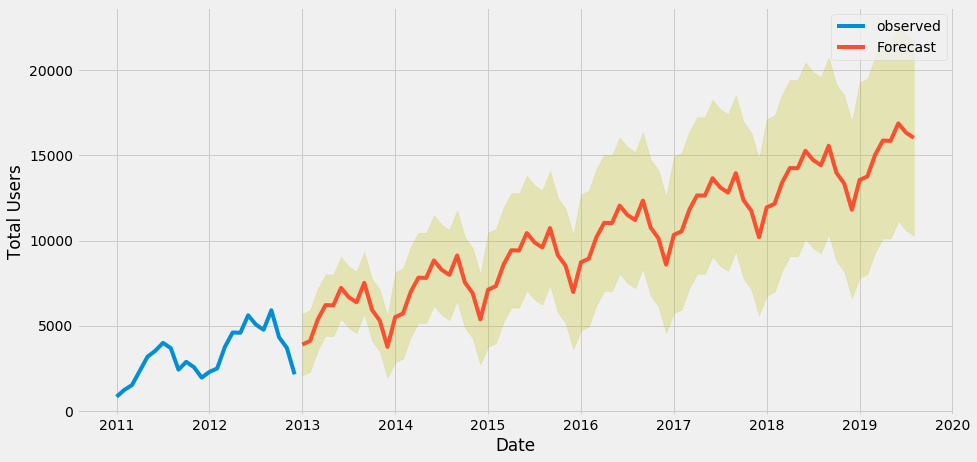

In [19]:
pred_uc = results.get_forecast(steps=80)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='y', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Total Users')

plt.legend()
plt.show()

- From the visualization above, it can demonstrate that this model clearly captured total users in weather type 1's seasonality and upward trend. The number of user is increased at the middle of the year and for every year, the trend of it keep going upward.